<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crx_data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

crx_data = pd.read_csv(crx_data_link)

# Just exploring
# crx_names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names'
# crx_names = pd.read_csv(crx_data_link, skiprows=0)

In [2]:
crx_data.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [3]:
crx_data.shape

(689, 16)

In [0]:
crx_data.rename(columns={'b': 'A1', '30.83': 'A2', '0': 'A3', 'u':'A4', 'g' : 
                         'A5', 'w' : 'A6', 'v' : 'A7', '1.25' : 'A8', 't' : 'A9',
                        't.1' : 'A10', '01' : 'A11', 'f' : 'A12', 'g.1' : 'A13',
                        '00202' : 'A14', '0.1' : 'A15', '+' : 'A16'}, inplace=True)

In [5]:
crx_data.shape

(689, 16)

In [6]:
crx_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [7]:
crx_data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [8]:
crx_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [0]:
crx_data.replace('?', np.nan, inplace=True)


In [10]:
crx_data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
crx_data = crx_data.dropna(how='any')


In [12]:
crx_data.shape

(652, 16)

In [13]:

crx_data['A2'] = crx_data['A2'].astype(float)
crx_data['A11'] = crx_data['A11'].astype(float)
crx_data['A14'] = crx_data['A14'].astype(float)
crx_data['A15'] = crx_data['A15'].astype(float)

'''
crx_data['A1'] = crx_data['A1'].astype(str)
crx_data['A4'] = crx_data['A4'].astype(str)
crx_data['A5'] = crx_data['A5'].astype(str)
crx_data['A6'] = crx_data['A6'].astype(str)
crx_data['A7'] = crx_data['A7'].astype(str)
crx_data['A9'] = crx_data['A9'].astype(str)
crx_data['A10'] = crx_data['A10'].astype(str)
crx_data['A12'] = crx_data['A12'].astype(str)
crx_data['A13'] = crx_data['A13'].astype(str)
'''


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

"\ncrx_data['A1'] = crx_data['A1'].astype(str)\ncrx_data['A4'] = crx_data['A4'].astype(str)\ncrx_data['A5'] = crx_data['A5'].astype(str)\ncrx_data['A6'] = crx_data['A6'].astype(str)\ncrx_data['A7'] = crx_data['A7'].astype(str)\ncrx_data['A9'] = crx_data['A9'].astype(str)\ncrx_data['A10'] = crx_data['A10'].astype(str)\ncrx_data['A12'] = crx_data['A12'].astype(str)\ncrx_data['A13'] = crx_data['A13'].astype(str)\n"

In [14]:
crx_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0.0,t,g,360.0,0.0,+


In [15]:
crx_data['A8'].head()

0    3.04
1    1.50
2    3.75
3    1.71
4    2.50
Name: A8, dtype: float64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
from scipy import stats

In [0]:
# TODO

con_features = ['A2', 'A3','A8','A11', 'A14', 'A15']
cat_features = ['A1','A4','A5','A6','A7','A9','A10','A12','A13']

crx_data = crx_data.reset_index(drop=True)
crx_con = crx_data[con_features]
crx_cat = crx_data[cat_features]

In [0]:
crx_con.boxplot()


In [0]:
# Nothing useful here! Just wanted to show some data because nothing came up on the boxplot
crx_con.count().plot(kind='bar')


In [0]:
crx_cat.dtypes

In [0]:
crx_con.dtypes

In [0]:
crx_data['A16'] =  crx_data['A16'].replace({'+':1,'-':0})

In [44]:
# Statistically significant

stats.ttest_ind(crx_data['A2'], crx_data['A16'], nan_policy='omit')

Ttest_indResult(statistic=66.86748452095667, pvalue=0.0)

In [45]:
# EXTREMELY statistially significant

stats.ttest_ind(crx_data['A14'], crx_data['A16'], nan_policy='omit')

Ttest_indResult(statistic=27.27012812629493, pvalue=6.651011736999727e-130)

In [150]:
stats.ttest_ind(crx_data['A15'], crx_data['A16'], nan_policy='omit')

Ttest_indResult(statistic=4.929241777850441, pvalue=9.317354879712174e-07)

In [126]:
# Calculate our contingency table with margins
contingency_table_A9 = pd.crosstab(
    crx_data['A9'],
    crx_data['A16'],
    margins = True)

contingency_table_A9

A16,0,1,All
A9,,,
f,286,18,304
t,71,277,348
All,357,295,652


In [91]:
# Very statistically significant

chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table_A9)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")

Chi-Squared: 355.524811777326
P-value: 1.124719497069897e-75


In [112]:
# Calculate our contingency table with margins
contingency_table_A12 = pd.crosstab(
    crx_data['A12'],
    crx_data['A16'],
    margins = True)

contingency_table_A12

A16,0,1,All
A12,,,
f,200,150,350
t,157,145,302
All,357,295,652


In [113]:
# Not statistically significant; little variance

chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table_A12)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")

Chi-Squared: 1.7397040755913953
P-value: 0.7834933269220561


In [148]:
# An extra chi-squared test

# Calculate our contingency table with margins
contingency_table_final = pd.crosstab(
    crx_data['A6'],
    crx_data['A16'],
    margins = True)

contingency_table_A13

A16,0,1,All
A13,,,
g,318,279,597
p,1,1,2
s,38,15,53
All,357,295,652


In [149]:
# Statistically significant!

chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table_final)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")

Chi-Squared: 89.51520073703932
P-value: 2.359895288334015e-08


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# Interpretation of data

With both our t-tests and Chi-squared tests, we had the option to choose at least one that is extremely different between the two classes and another that is different to a less extreme degree (but still statistically significant). This is how I chose my features for the t-test. 

For the Chi-squared tests, I chose one extremely statistically significant class-feature pairing, and one statistically insignificant pairing.

In all examples, 1=''+'' (encoded)

## T-test #1

A2 and '+'



```
Ttest_indResult(statistic=66.86748452095667, pvalue=0.0)
```

This result has a p-value of exactly zero. It is statistically significant and we can therefore reject the null hypothesis that the two features are independent.

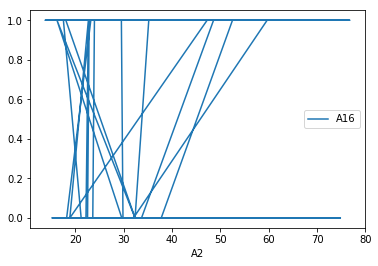

In [127]:
crx_data.plot.line('A2', 'A16');


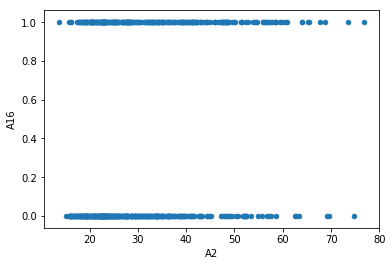

In [128]:
crx_data.plot.scatter('A2', 'A16');


## T-test #2

A14 and '+'

```
Ttest_indResult(statistic=27.27012812629493, pvalue=6.651011736999727e-130)```

This result has an extremely low p-value of `6.651011736999727e-130`. It is extremely statistically significant and we can therefore reject the null hypothesis that the two features are independent.

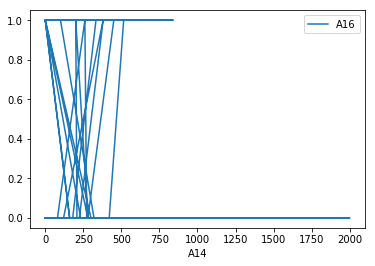

In [129]:
crx_data.plot.line('A14', 'A16');

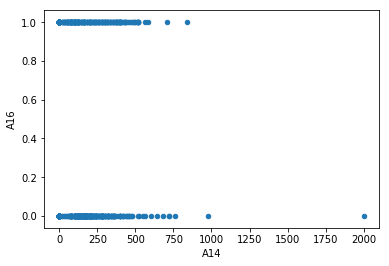

In [131]:
crx_data.plot.scatter('A14', 'A16');


## T-test #3

A15 and '+'


```
Ttest_indResult(statistic=4.929241777850441, pvalue=9.317354879712174e-07)```

This result has an extremely low p-value of `9.317354879712174e-07`. It is extremely statistically significant and we can therefore reject the null hypothesis that the two features are independent. A15 is positively correlated with +.

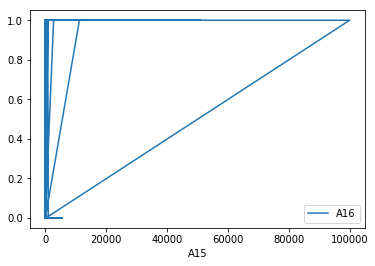

In [151]:
crx_data.plot.line('A15', 'A16');

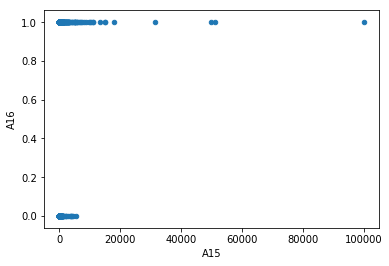

In [152]:
crx_data.plot.scatter('A15', 'A16');

## Chi-squared test #1

A9 and +

```
Chi-Squared: 355.524811777326
P-value: 1.124719497069897e-75```

This is very statistically significant and we can therefore reject the null hypothesis that the two features are independent. The chi square scorer shows high correlation between the '+' value and the A9 values.

## Chi-squared test #2

A12 and +


```
Chi-Squared: 1.7397040755913953
P-value: 0.7834933269220561```

This is not statistically significant and we can't reject the null hypothesis given this result; as far as we can tell, the features are independent. The p-value is greater than .05 and the Chi-squared score shows little correlation.

## Chi-squared test #3

A6 and +


```
Chi-Squared: 89.51520073703932
P-value: 2.359895288334015e-08```

This is quite statistically significant and we can reject the null hypothesis given this result; the features are *not* independent.

## The most challenging parts of this Sprint were data cleaning and test interpretation